bank client data:
* 1 - age (numeric)

* 2 - job : type of job (categorical: "admin.","blue-collar","entrepreneur","housemaid","management","retired","self-employed","services","student","technician","unemployed","unknown")

* 3 - marital : marital status (categorical: "divorced","married","single","unknown"; note: "divorced" means divorced or widowed)

* 4 - education (categorical: "basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree","unknown")

* 5 - default: has credit in default? (categorical: "no","yes","unknown")

* 6 - housing: has housing loan? (categorical: "no","yes","unknown")

* 7 - loan: has personal loan? (categorical: "no","yes","unknown")

related with the last contact of the current campaign:
* 8 - contact: contact communication type (categorical: "cellular","telephone")
* 9 - month: last contact month of year (categorical: "jan", "feb", "mar", …, "nov", "dec")

* 10 - day: last contact day

* 11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

other attributes:
* 12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

* 13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

* 14 - previous: number of contacts performed before this campaign and for this client (numeric)

* 15 - poutcome: outcome of the previous marketing campaign (categorical: "failure","nonexistent","success")

social and economic context attributes
* 16 - balance: account balance in euros

* 17 - y - has the client subscribed a term deposit? (binary: "yes","no")

Missing Attribute Values: There are several missing values in some categorical attributes, all coded with the "unknown" label. These missing values can be treated as a possible class label or using deletion or imputation techniques.

# Data Wrangling

In [108]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

# Data Wrangling
- Loading the Dataset
- Indetifying nulls
- Indetifying duplicates
- Categorical features and numerical features
- Encoding categorical features

In [109]:
bank_df = pd.read_csv('bank.csv', delimiter=';')

# Shows every column
pd.set_option('display.max_columns', None)

bank_df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49727,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
49728,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
49729,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
49730,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [110]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49732 entries, 0 to 49731
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        49732 non-null  int64 
 1   job        49732 non-null  object
 2   marital    49732 non-null  object
 3   education  49732 non-null  object
 4   default    49732 non-null  object
 5   balance    49732 non-null  int64 
 6   housing    49732 non-null  object
 7   loan       49732 non-null  object
 8   contact    49732 non-null  object
 9   day        49732 non-null  int64 
 10  month      49732 non-null  object
 11  duration   49732 non-null  int64 
 12  campaign   49732 non-null  int64 
 13  pdays      49732 non-null  int64 
 14  previous   49732 non-null  int64 
 15  poutcome   49732 non-null  object
 16  y          49732 non-null  object
dtypes: int64(7), object(10)
memory usage: 6.5+ MB


In [111]:
print(f'Columns: {bank_df.shape[1]}\nRegisters: {bank_df.shape[0]}')

Columns: 17
Registers: 49732


In [112]:
bank_df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [113]:
bank_df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,49732.000000,49732.000000,49732.000000,49732.000000,49732.000000,49732.000000,49732.000000
mean,40.957472,1367.761562,15.816315,258.690179,2.766549,40.158630,0.576892
std,10.615008,3041.608766,8.315680,257.743149,3.099075,100.127123,2.254838
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1431.000000,21.000000,320.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [114]:
numerical_features = list(bank_df._get_numeric_data().columns)

print(f'Numerical features:\n', *numerical_features, sep='\n- ',
    end=f'\n\nNumber of numerical features: {len(numerical_features)}')

Numerical features:

- age
- balance
- day
- duration
- campaign
- pdays
- previous

Number of numerical features: 7

In [115]:
categorical_features = list(set(bank_df.columns) - set(numerical_features))
print(f'Categorical features:\n', *categorical_features, sep='\n- ',
    end=f'\n\nNumber of categorical features: {len(categorical_features)}')

Categorical features:

- education
- contact
- poutcome
- default
- job
- loan
- marital
- y
- month
- housing

Number of categorical features: 10

In [116]:
# Number of unique values each categorical feature has
bank_df[categorical_features].nunique()

education     4
contact       3
poutcome      4
default       2
job          12
loan          2
marital       3
y             2
month        12
housing       2
dtype: int64

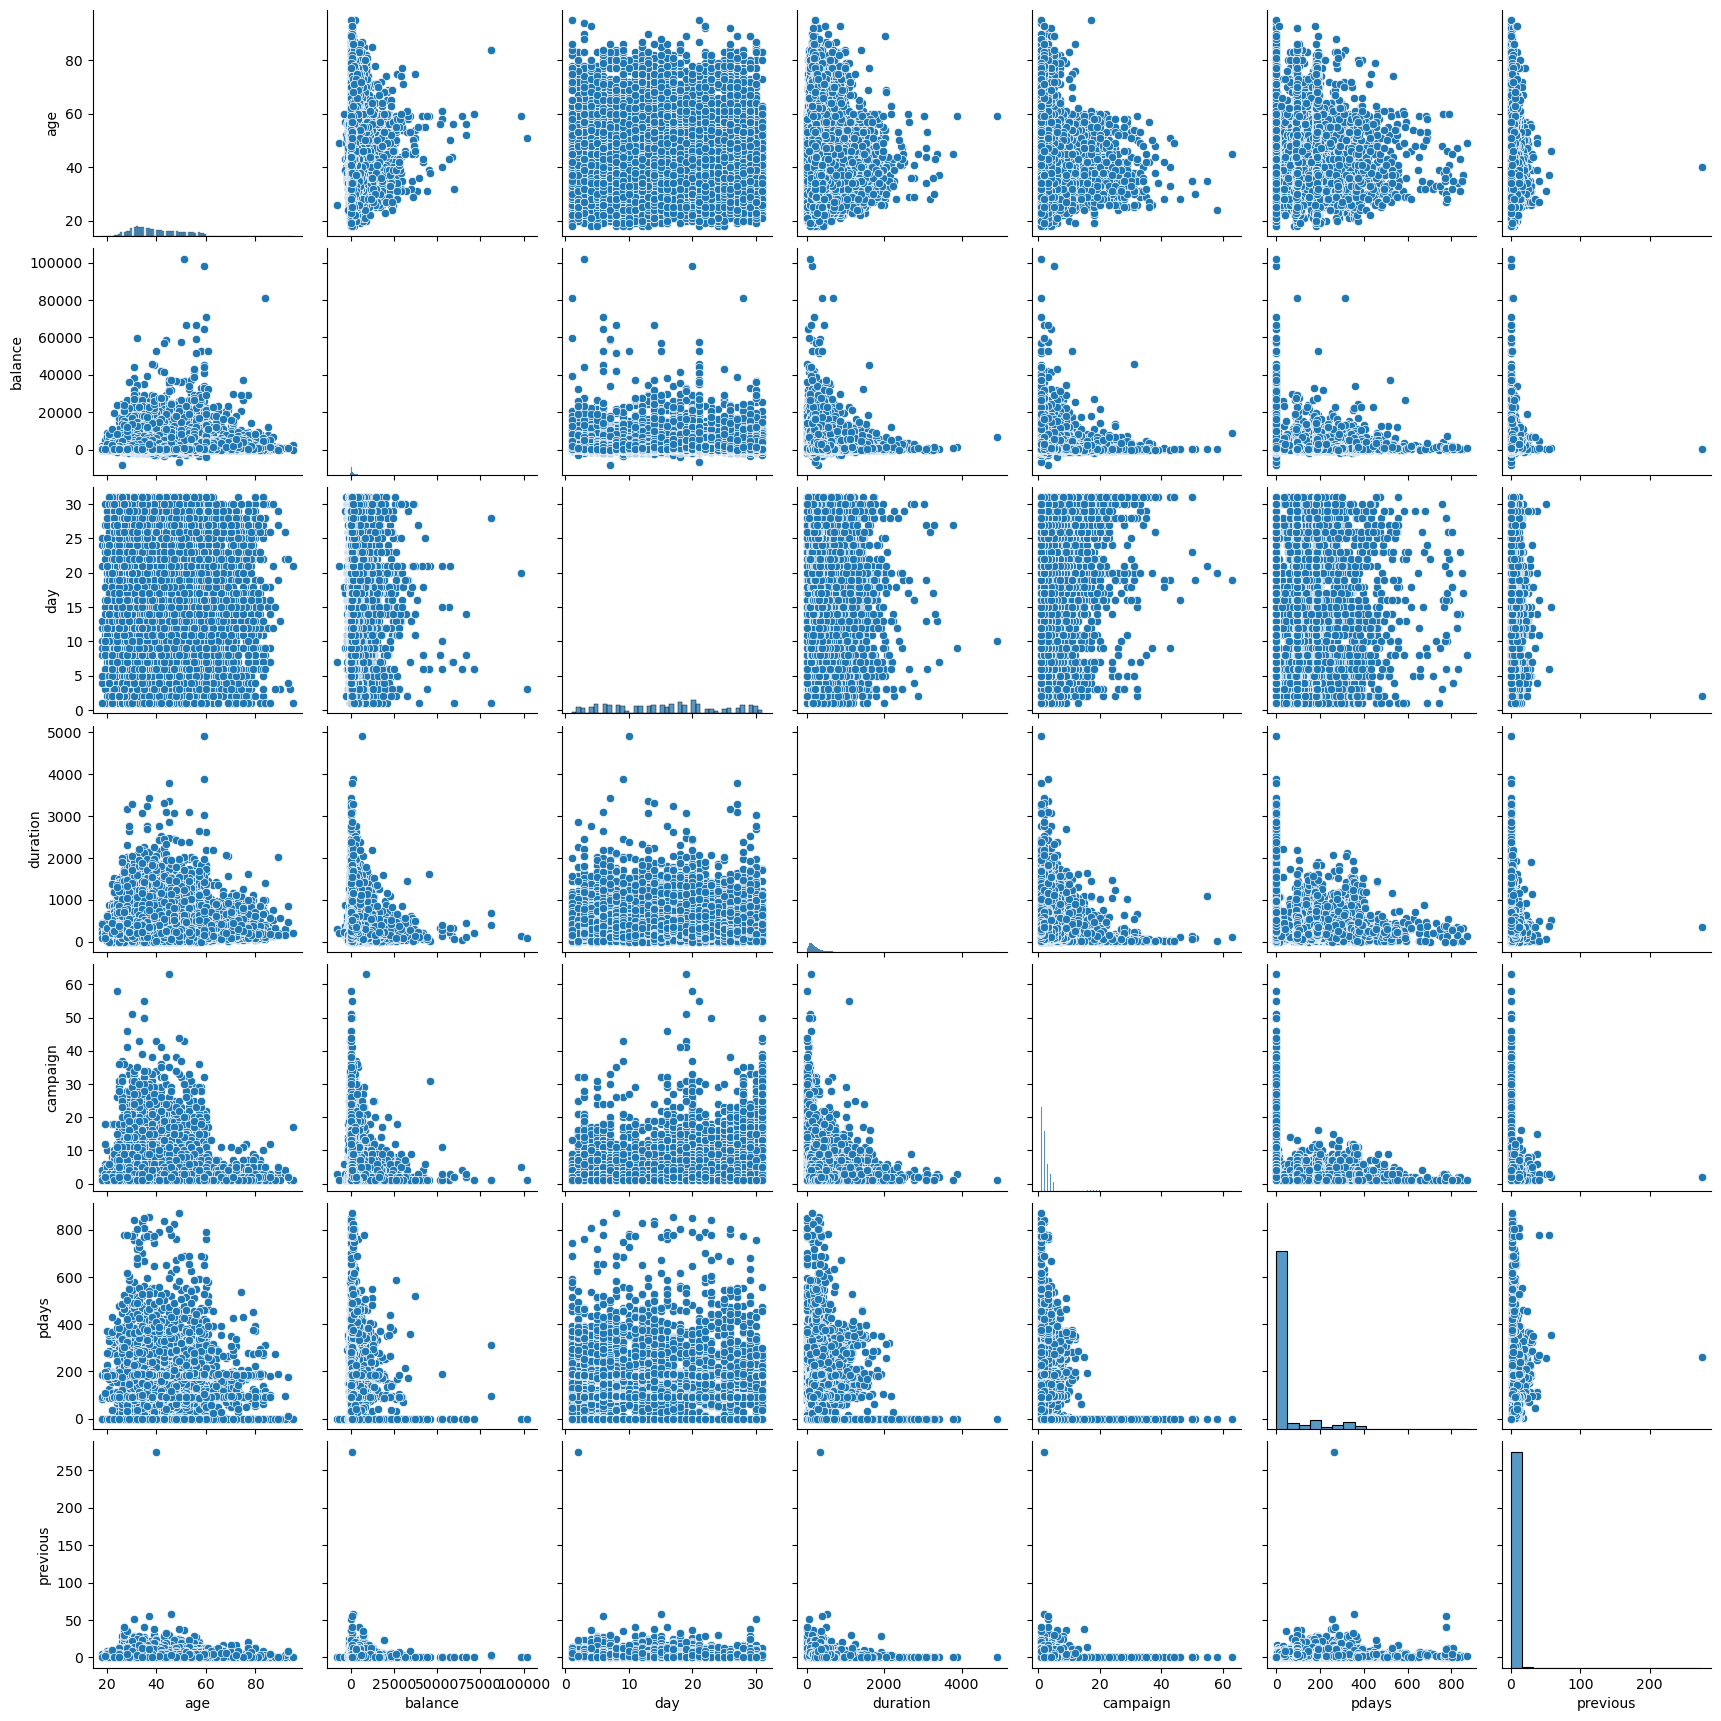

In [117]:
sns.pairplot(bank_df)

In [118]:
# Encoding categorical features
encoded_df = pd.DataFrame()
encoded_df[categorical_features] = bank_df[categorical_features].apply(LabelEncoder().fit_transform)
encoded_df[numerical_features] = bank_df[numerical_features]
encoded_df

,education,contact,poutcome,default,job,loan,marital,y,month,housing,age,balance,day,duration,campaign,pdays,previous
0,0,0,3,0,10,0,1,0,10,0,30,1787,19,79,1,-1,0
1,1,0,0,0,7,1,1,0,8,1,33,4789,11,220,1,339,4
2,2,0,0,0,4,0,2,0,0,1,35,1350,16,185,1,330,1
3,2,2,3,0,4,1,1,0,6,1,30,1476,3,199,4,-1,0
4,1,2,3,0,1,0,1,0,8,1,59,0,5,226,1,-1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49727,2,0,3,0,9,0,1,1,9,0,51,825,17,977,3,-1,0
49728,0,0,3,0,5,0,0,1,9,0,71,1729,17,456,2,-1,0
49729,1,0,2,0,5,0,1,1,9,0,72,5715,17,1127,5,184,3
49730,1,1,3,0,1,0,1,0,9,0,57,668,17,508,4,-1,0


In [119]:
# Features
X = encoded_df
bank_features = X.columns

# Target
y = encoded_df['y']

# Principal Component Analysis
- It is being used to `reduce the dimensionality` of the dataset and as conseuquence of other related steps, to also find the `features that mostly contributes` to the data variance.
- Firstly, the data is being `standardized` by centering the data `around the mean`.
- Since we want a variance ratio that explains more than `95 %` of the data, the `number of components` that will be included in the PCA is determined having this ratio hard coded.
- The data is `fit` with just `numerical features`.
- For this case, in particular, `categorical features` were `encoded` as numerical. Later evaluation might be needed to check is they contributed positively or not.

In [120]:
# Centering data around their mean before applying the PCA
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)

X = pd.DataFrame(scaler.transform(X), columns=encoded_df.columns)
X

,education,contact,poutcome,default,job,loan,marital,y,month,housing,age,balance,day,duration,campaign,pdays,previous
0,-1.638131,-0.713976,0.444854,-0.135066,1.728382,-0.435713,-0.273115,-0.363703,1.488595,-1.120775,-1.032273,0.137836,0.382857,-0.697175,-0.570030,-0.411068,-0.255849
1,-0.301327,-0.713976,-2.587558,-0.135066,0.811265,2.295087,-0.273115,-0.363703,0.823365,0.892240,-0.749651,1.124823,-0.579191,-0.150113,-0.570030,2.984650,1.518132
2,1.035478,-0.713976,-2.587558,-0.135066,-0.105852,-0.435713,1.373057,-0.363703,-1.837556,0.892240,-0.561237,-0.005840,0.022089,-0.285908,-0.570030,2.894763,0.187646
3,1.035478,1.512545,0.444854,-0.135066,-0.105852,2.295087,-0.273115,-0.363703,0.158135,0.892240,-1.032273,0.035586,-1.541238,-0.231590,0.398010,-0.411068,-0.255849
4,-0.301327,1.512545,0.444854,-0.135066,-1.022970,-0.435713,-0.273115,-0.363703,0.823365,0.892240,1.699736,-0.449688,-1.300726,-0.126834,-0.570030,-0.411068,-0.255849
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49727,1.035478,-0.713976,0.444854,-0.135066,1.422676,-0.435713,-0.273115,2.749495,1.155980,-1.120775,0.946078,-0.178447,0.142345,2.786949,0.075330,-0.411068,-0.255849
49728,-1.638131,-0.713976,0.444854,-0.135066,0.199853,-0.435713,-1.919288,2.749495,1.155980,-1.120775,2.830222,0.118767,0.142345,0.765537,-0.247350,-0.411068,-0.255849
49729,-0.301327,-0.713976,-0.565950,-0.135066,0.199853,-0.435713,-0.273115,2.749495,1.155980,-1.120775,2.924429,1.429271,0.142345,3.368930,0.720691,1.436602,1.074637
49730,-0.301327,0.399285,0.444854,-0.135066,-1.022970,-0.435713,-0.273115,-0.363703,1.155980,-1.120775,1.511321,-0.230065,0.142345,0.967290,0.398010,-0.411068,-0.255849


Number of components that explains a variance greater than 95.00 %: 15


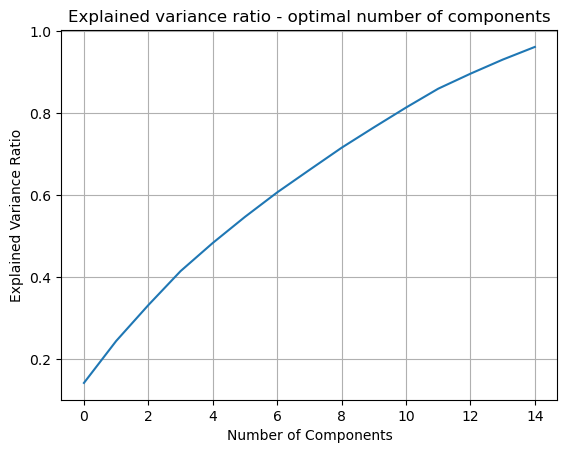

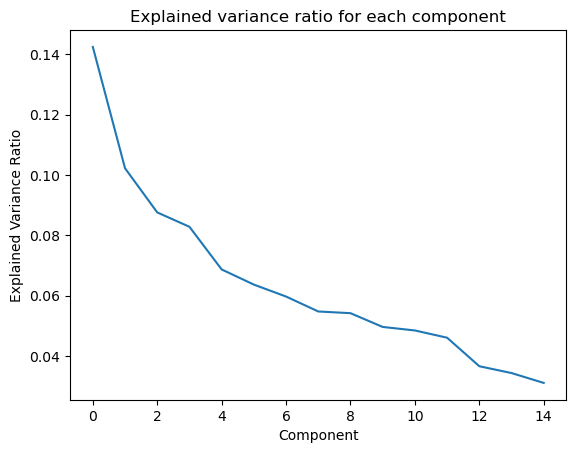

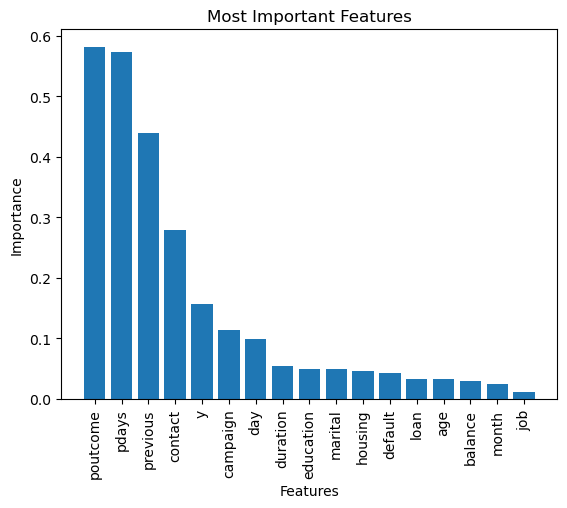

In [121]:
from sklearn.decomposition import PCA

variance_ratio = 0.95

# Create a PCA object with n_components set to the number of components that retain 95% of the total variance
pca = PCA(n_components=variance_ratio)

# Fit and transform the data
pca_components = pca.fit_transform(X)

# Get the feature importance
importance = np.abs(pca.components_[0])

# Get the indices of the most important features
indices = np.argsort(importance)[::-1]

# Get the optimal number of components based on the explained variance ratio
n_components = np.argmax(np.cumsum(pca.explained_variance_ratio_) > variance_ratio) + 1
print(f'Number of components that explains a variance greater than {variance_ratio*100:.2f} %: {n_components}')

# Plot the explained variance ratio to determine the optimal number of components
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title('Explained variance ratio - optimal number of components')
plt.xlabel("Number of Components")
plt.ylabel("Explained Variance Ratio")
plt.grid()
plt.show()

# Plot the explained variance ratio for each component
plt.plot(pca.explained_variance_ratio_)
plt.title('Explained variance ratio for each component')
plt.xlabel('Component')
plt.ylabel('Explained Variance Ratio')
plt.show()

# Plot the feature importance
plt.bar(X.columns[indices], importance[indices])
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("Most Important Features")
plt.xticks(rotation=90)
plt.show()

In [122]:
from sklearn.cluster import KMeans

# Select the top n most important features
n = 5
selected_features = X.columns[indices[:n]]
df_selected = X[selected_features]

# Fit KMeans with n_clusters set to 3
kmeans = KMeans(n_clusters=3)
kmeans.fit(df_selected)

# Get the cluster labels
labels = kmeans.labels_

<AxesSubplot: >

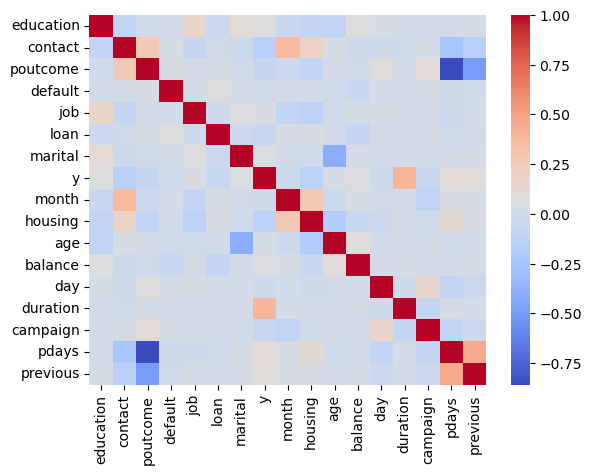

In [123]:
sns.heatmap(pd.DataFrame(X).corr(), cmap='coolwarm')

In [124]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X)
pca.explained_variance_ratio_

array([0.14249089, 0.10222385, 0.08757584, 0.08280472, 0.06865598,
       0.06362584, 0.05966404, 0.05470776, 0.05414234, 0.04957639,
       0.04841101, 0.04600487, 0.03654021, 0.03427504, 0.03100293,
       0.03016919, 0.00812912])

In [125]:
#pd.DataFrame(pca.components_, columns=encoded_df.columns).head(5)

# Customer Segmentation - Clustering using K-Means
- Elbow Method using within-cluster-sum-of-squares (WCSS) to find the elbow
- Elbow Method is being used to determine the number of cluster

In [126]:
from sklearn.cluster import KMeans

wcss = [KMeans(n_clusters=i, random_state=0).fit(encoded_df.drop(columns=['y'], axis='columns')).inertia_ for i in range(1, 11)]
wcss.sort(reverse=True)
wcss


[463893763061.6582,
 219649738894.97513,
 123705691269.22368,
 80063436804.24101,
 53255943605.72811,
 39380685619.95831,
 31343264600.306587,
 25090802503.375298,
 20856853300.749023,
 18139760807.85881]

Plotting the Elbow Method

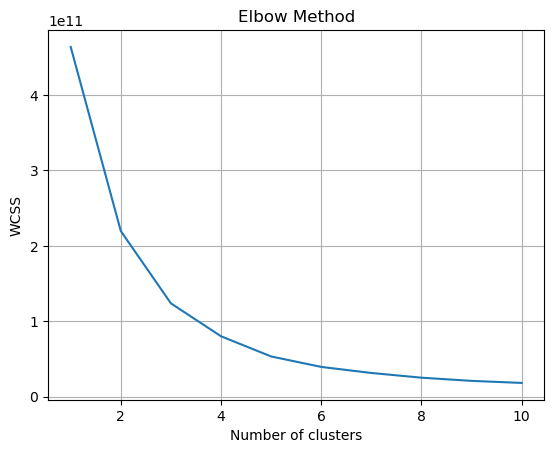

In [127]:
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid()
plt.show()

Number of clusters: 3 since by this number we can notice a faster decrease (the elbow of the curve)

# K-Means
- Number of Clusters is set to 3.

In [128]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=42)
y_pred = kmeans.fit_predict(encoded_df)
encoded_df["cluster"] = y_pred
encoded_df

,education,contact,poutcome,default,job,loan,marital,y,month,housing,age,balance,day,duration,campaign,pdays,previous,cluster
0,0,0,3,0,10,0,1,0,10,0,30,1787,19,79,1,-1,0,0
1,1,0,0,0,7,1,1,0,8,1,33,4789,11,220,1,339,4,1
2,2,0,0,0,4,0,2,0,0,1,35,1350,16,185,1,330,1,0
3,2,2,3,0,4,1,1,0,6,1,30,1476,3,199,4,-1,0,0
4,1,2,3,0,1,0,1,0,8,1,59,0,5,226,1,-1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49727,2,0,3,0,9,0,1,1,9,0,51,825,17,977,3,-1,0,0
49728,0,0,3,0,5,0,0,1,9,0,71,1729,17,456,2,-1,0,0
49729,1,0,2,0,5,0,1,1,9,0,72,5715,17,1127,5,184,3,1
49730,1,1,3,0,1,0,1,0,9,0,57,668,17,508,4,-1,0,0


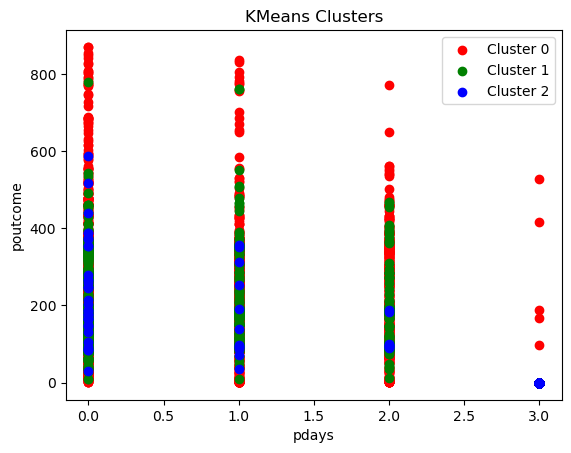

In [129]:
# Select the top n most important features
n = 15
selected_features = X.columns[indices[:n]]

# Get the cluster labels
labels = kmeans.labels_

# plotting those that most contribute to variance with different colors for each cluster
colors = ['red', 'green', 'blue']
for i in range(3):
    cluster = encoded_df[labels == i]
    plt.scatter(cluster[selected_features[0]], cluster[selected_features[1]], c=colors[i], label=f"Cluster {i}")

plt.xlabel(selected_features[1])
plt.ylabel(selected_features[0])
plt.title("KMeans Clusters")
plt.legend()
plt.show()

In [130]:
f'{[dict(encoded_df.cluster.value_counts()).items()]}'

'[dict_items([(0, 44543), (1, 4837), (2, 352)])]'

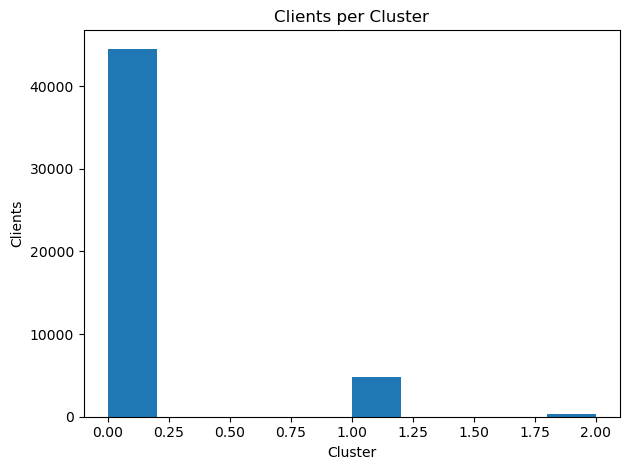

In [131]:
encoded_df['cluster'].value_counts()
plt.title('Clients per Cluster')
plt.hist(encoded_df['cluster'])
plt.xlabel('Cluster')
plt.ylabel('Clients')
plt.tight_layout()
plt.show()

<AxesSubplot: >

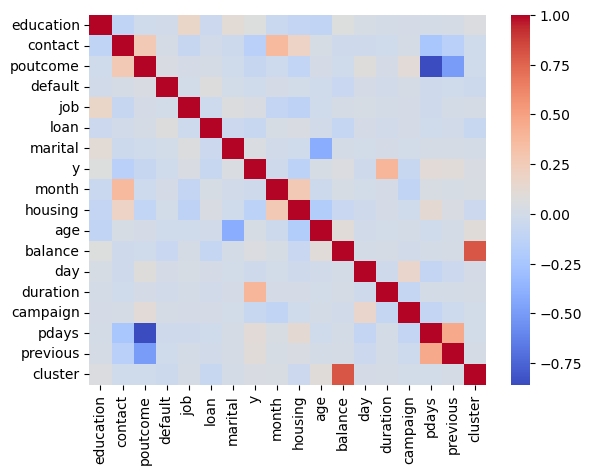

In [132]:
sns.heatmap(encoded_df.corr(), cmap='coolwarm')

<AxesSubplot: xlabel='balance', ylabel='cluster'>

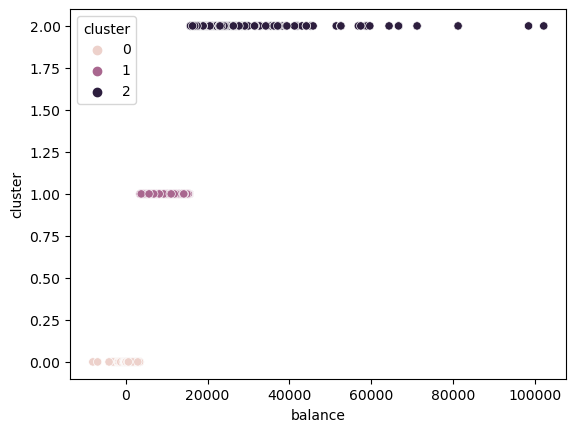

In [133]:
sns.scatterplot(x=encoded_df['balance'], y=encoded_df['cluster'], hue=encoded_df["cluster"])

(array([4.3488e+04, 5.8050e+03, 3.3200e+02, 6.6000e+01, 2.2000e+01,
        7.0000e+00, 6.0000e+00, 2.0000e+00, 2.0000e+00, 2.0000e+00]),
 array([ -8019. ,   2995.6,  14010.2,  25024.8,  36039.4,  47054. ,
         58068.6,  69083.2,  80097.8,  91112.4, 102127. ]),
 <BarContainer object of 10 artists>)

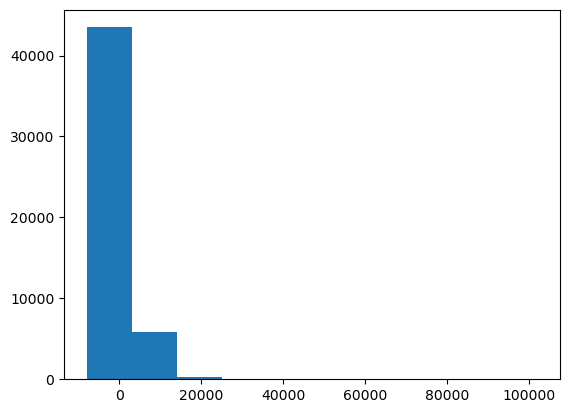

In [134]:
plt.hist(encoded_df['balance'])

(array([43922.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,  5810.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

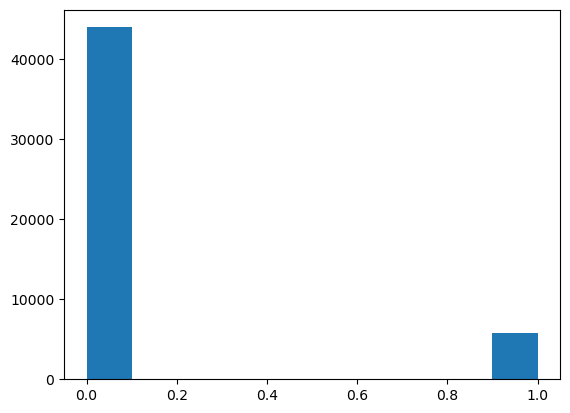

In [135]:
plt.hist(encoded_df['y'])

<AxesSubplot: xlabel='balance', ylabel='y'>

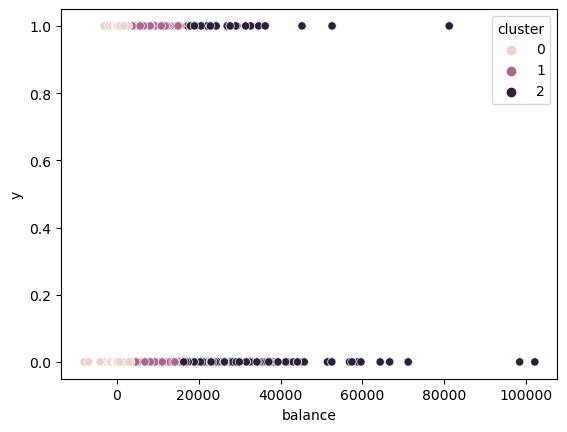

In [136]:
sns.scatterplot(x=encoded_df['balance'], y=encoded_df['y'], hue=encoded_df["cluster"])

<AxesSubplot: xlabel='age', ylabel='balance'>

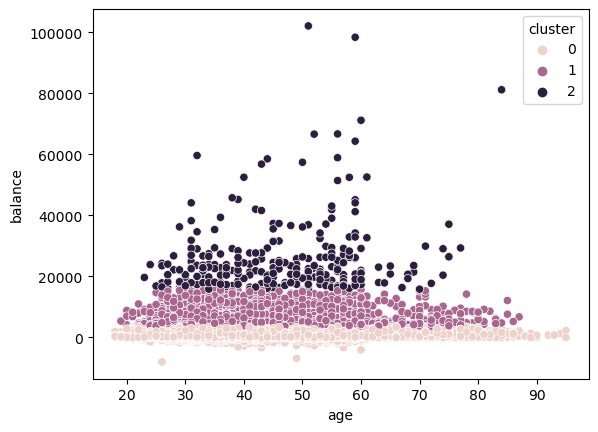

In [137]:
sns.scatterplot(x=encoded_df['age'], y=encoded_df['balance'], hue=encoded_df['cluster'])

# Conclusions:
* - We can notice a high correlation between the client's account `balance` and each `cluster`.
* - Clients that belongs to `Cluster 2` have higher account `balance`, followed by `Cluster 1`, then `Cluster 0`.
* - Most clients belongs to `Cluster 0` , followed by `Cluster 1`, then `Cluster 2`

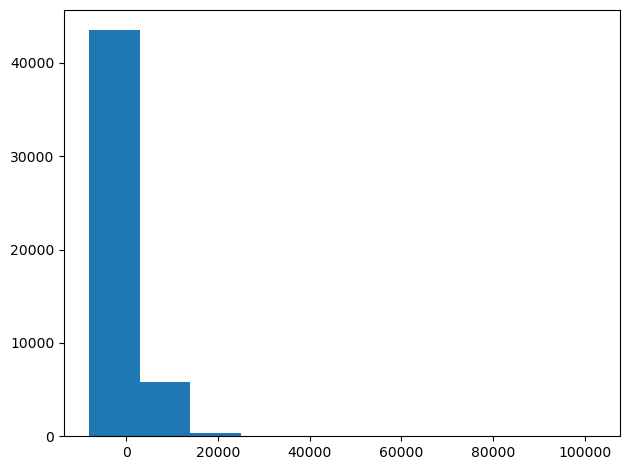

In [138]:
plt.hist(encoded_df['balance'])
plt.tight_layout()
plt.show()

In [139]:
#sns.pairplot(encoded_df, hue='cluster')

In [140]:
encoded_df['id'] = encoded_df.index + 1
encoded_df[['id', 'cluster']]

,id,cluster
0,1,0
1,2,1
2,3,0
3,4,0
4,5,0
...,...,...
49727,49728,0
49728,49729,0
49729,49730,1
49730,49731,0


# Logistic Regression:
It is being used to predict term-deposit subscriptions based on the clusters created through K-means

In [141]:
# Features
X = encoded_df.drop(columns=['y'], axis='columns')
bank_features = X.columns

# Target
y = encoded_df['y']

In [142]:
# Standardizing the data
scaler = StandardScaler()
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X), columns=encoded_df.drop(columns=['y'], axis=0).columns)

In [143]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=100)
model.fit(X, y)

# find which of the clusters are more likely to have "yes" in those predictions
predictions = model.predict(X)
clusters = kmeans.labels_
yes_count, total_count = [], []
for i in range(3):
    yes_count.append(np.sum(predictions[clusters == i] == 1)) # yes is encoded as 1
    total_count.append(np.sum(clusters == i))
    print(f'Cluster {i} has {yes_count[i]} yes predictions out of {total_count[i]} -> {round((yes_count[i]/total_count[i])*100, 2)} %')

Cluster 0 has 2020 yes predictions out of 44543 -> 4.53 %
Cluster 1 has 398 yes predictions out of 4837 -> 8.23 %
Cluster 2 has 31 yes predictions out of 352 -> 8.81 %


# Conclusions:
* - Most of the predictions occured for `Cluster 0` clients given that most of the population belongs to this cluster.
* - In terms of `effectiveness`, `Cluster 2` clients subscribed more term-deposits with `8.81 %` followed by `Cluster 2` clients with `8.23 %`.

In [144]:
# reversing the encoding
encoded_df[categorical_features] = bank_df[categorical_features]
encoded_df.head()

,education,contact,poutcome,default,job,loan,marital,y,month,housing,age,balance,day,duration,campaign,pdays,previous,cluster,id
0,primary,cellular,unknown,no,unemployed,no,married,no,oct,no,30,1787,19,79,1,-1,0,0,1
1,secondary,cellular,failure,no,services,yes,married,no,may,yes,33,4789,11,220,1,339,4,1,2
2,tertiary,cellular,failure,no,management,no,single,no,apr,yes,35,1350,16,185,1,330,1,0,3
3,tertiary,unknown,unknown,no,management,yes,married,no,jun,yes,30,1476,3,199,4,-1,0,0,4
4,secondary,unknown,unknown,no,blue-collar,no,married,no,may,yes,59,0,5,226,1,-1,0,0,5


In [145]:
# TODO
# evaluate models used in this notebook
# draw graphs with networkx
# add weights
# plot graphs and export to gephi